<a href="https://colab.research.google.com/github/rubanzasilva/tabularPlayGroundApril/blob/main/tabularPlaygroundApril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import seaborn as sns
from pathlib import Path
import PIL
import json
from pathlib import Path

In [ ]:
!pip install fastcore fastai --upgrade

In [ ]:
from fastai.tabular.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/trainJoined.csv')
df.head()

,sequence_0,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sequence_1,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,47,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,47,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,47,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,47,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,47,0


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"5edc75fbf33375a2baf7488f8b05ccc0"}'}

In [ ]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# List available datasets.
!kaggle datasets list

ref                                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/ankanhore545/cost-of-living-index-2022                           Cost of Living Index 2022                          176KB  2022-03-26 04:56:04           2161         34  1.0              
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                              2KB  2022-04-07 09:53:48           6164        358  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease             Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           9324        200  1.0              
datasets/kuchhb

In [ ]:
!kaggle competitions download -c tabular-playground-series-apr-2022  -p /content/datasets 

 99% 169M/171M [00:07<00:00, 27.1MB/s]
100% 171M/171M [00:07<00:00, 24.1MB/s]


In [ ]:
!ls  drive/MyDrive

In [ ]:
!unzip datasets/tabular-playground-series-apr-2022.zip

Archive:  datasets/tabular-playground-series-apr-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
  inflating: train_labels.csv        


In [ ]:
path = Path('')
path

Path('.')

In [ ]:
train_df = df
# train_labels_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
train_df.head()

,sequence_0,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sequence_1,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,47,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,47,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,47,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,47,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,47,0


FEATURE ENGINEERING

In [ ]:
train_df.columns


Index(['sequence_0', 'subject', 'step', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sequence_1', 'state'],
      dtype='object')

In [ ]:
train_df.to_pickle(path/'train_clean')
test_df.to_pickle('test_clean')

In [ ]:
!ls

sample_data	       tabular-playground-dataset  test.csv
sample_submission.csv  test_clean		   train.csv


categorical-direction,x,y
continuos- row-id,time,congestion


In [24]:
train_df.head()

,sequence_0,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sequence_1,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,47,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,47,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,47,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,47,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,47,0


In [25]:
dls = TabularDataLoaders.from_df(df=train_df, path=path, y_names="state",
    cat_names = [  'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
        ],
    cont_names=['subject','step','sequence_0',],
    procs = [Categorify, FillMissing, Normalize])

In [26]:
learn = tabular_learner(dls, metrics=mae)

In [27]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(23978, 454)
    (1): Embedding(25678, 471)
    (2): Embedding(4455, 177)
    (3): Embedding(24755, 462)
    (4): Embedding(352091, 600)
    (5): Embedding(21907, 431)
    (6): Embedding(23096, 444)
    (7): Embedding(26077, 476)
    (8): Embedding(1795, 106)
    (9): Embedding(28047, 495)
    (10): Embedding(245776, 600)
    (11): Embedding(26314, 478)
    (12): Embedding(266679, 600)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=5797, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=Tr

In [32]:
learn.lr_find()

RuntimeError: ignored

In [30]:
learn.fit_one_cycle(20, 1e-2,wd=0.2)

epoch,train_loss,valid_loss,mae,time


RuntimeError: ignored

In [31]:
torch.cuda.empty_cache()

In [ ]:
learn.show_results()

Saving model, loading and retraining

In [ ]:
learn.save('testA')

Path('tabular-playground-dataset/models/testA.pth')

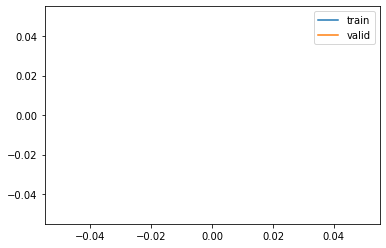

In [ ]:
learn.recorder.plot_loss()

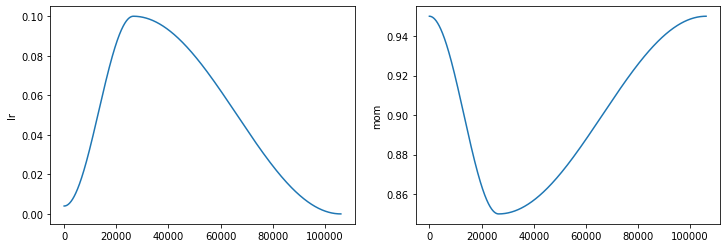

In [ ]:
learn.recorder.plot_sched()

SuggestedLRs(valley=9.12010818865383e-07)

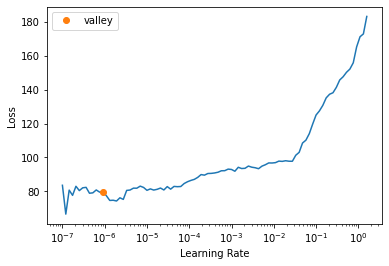

In [ ]:
learn.lr_find()

In [ ]:
learn.load('testA');

In [ ]:
learn.fit_one_cycle(10,1e-7)

epoch,train_loss,valid_loss,mae,time
0,87.816429,84.369606,6.558010,02:28
1,85.518288,83.659958,6.486071,02:25
2,87.373894,83.488892,6.470223,02:25
3,88.456909,83.482864,6.472209,02:28
4,85.075317,83.411667,6.469173,02:25
5,85.995415,83.897278,6.514680,02:26
6,90.045227,83.921242,6.473896,02:24
7,92.389565,83.806862,6.509012,02:25
8,83.515533,83.400970,6.467444,02:24
9,88.980583,83.567787,6.480740,02:23


Making predictions on test set test_dl method of the DataLoaders.

Learner.get_preds will give you the predictions

In [ ]:
test_df=pd.read_csv('train.csv')
#test_df = train_df.copy()
test_df.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [ ]:
test_dl = learn.dls.test_dl(test_df)
pred = learn.get_preds(dl=test_dl)
pred

(tensor([[45.6330],
         [48.1275],
         [27.4458],
         ...,
         [42.2242],
         [35.3959],
         [57.2933]]), None)

In [ ]:

pred

(tensor([[45.6330],
         [48.1275],
         [27.4458],
         ...,
         [42.2242],
         [35.3959],
         [57.2933]]), None)

In [ ]:
learn.show_results()

,time,x,y,direction,Direction_EB,Direction_NB,Direction_SB,Direction_WB,Direction_NE,Direction_SW,Direction_NW,Direction_SE,Time_year,Time_month,Time_day,Time_hour,Time_minute,Time_second,Time_week_of_year,Time_day_of_year,Time_quarter,congestion,congestion_pred
0,229,1,4,1,2,1,1,1,1,1,1,1,1,1,4,5,1,1,1,4,1,36,21.353271
1,434,1,3,8,1,1,1,2,1,1,1,1,1,1,7,1,2,1,1,7,1,34,29.501602
2,753,3,2,4,1,1,1,1,1,1,2,1,1,1,11,11,3,1,2,11,1,29,28.185371
3,135,2,1,3,1,1,1,1,2,1,1,1,1,1,2,21,3,1,1,2,1,65,48.667877
4,65,1,2,2,1,2,1,1,1,1,1,1,1,1,1,22,2,1,1,1,1,78,75.584824
5,570,1,2,2,1,2,1,1,1,1,1,1,1,1,8,22,3,1,2,8,1,72,70.860550
6,340,1,3,1,2,1,1,1,1,1,1,1,1,1,5,18,1,1,1,5,1,48,50.170631
7,192,3,2,5,1,1,2,1,1,1,1,1,1,1,3,16,3,1,1,3,1,39,37.338997
8,684,1,4,3,1,1,1,1,2,1,1,1,1,1,10,12,3,1,2,10,1,20,27.182396


In [ ]:
target_preds = pred[0]

test_df['congestion'] = target_preds

In [ ]:
test_df.to_csv('submission.csv', columns=['row_id','congestion'], index=False)

In [ ]:
sub = pd.read_csv(path/'submission.csv')
sub.head()

,row_id,congestion
0,0,45.633015
1,1,48.127525
2,2,27.445816
3,3,20.141201
4,4,67.431910


In [ ]:
sample = pd.read_csv(path/'sample_submission.csv')
sample.head()

,row_id,congestion
0,848835,0.0
1,848836,0.0
2,848837,0.0
3,848838,0.0
4,848839,0.0


In [ ]:
preds = learn.get_preds()
pred_tensors = preds[0]
actual_labels = preds[1].numpy()

In [ ]:
pred_tensors, actual_labels

total_to_test = 20000
correct = 0
for i in range(total_to_test):
    if(pred_tensors[i][0] > 0.5 and actual_labels[i] == 0):
        correct = correct + 1

print(f"{correct}/{total_to_test} correct")

25/20000 correct


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"5edc75fbf33375a2baf7488f8b05ccc0"}'}

In [ ]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
# This permissions change avoids a warning on Kaggle tool startup.
#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

kaggle.json  sample_submission.csv	 test_clean  train.csv
sample_data  tabular-playground-dataset  test.csv


In [ ]:
!rm kaggle.json

In [ ]:
!kaggle competitions submit -c tabular-playground-series-mar-2022 -f submission.csv -m "Message"


100% 748k/748k [00:02<00:00, 306kB/s]
Successfully submitted to Tabular Playground Series - Mar 2022

In [ ]:
learn

In [ ]:
learn.fit_one_cycle(5, 2e-4)

In [ ]:
learn.fit_one_cycle(5, 1e-4)

In [ ]:
learn.fit_one_cycle(5, 1e-4)

In [ ]:
learn.save('1')

datepart-fe

In [ ]:
learn.load('1');

In [ ]:
!ls models

1.pth


SuggestedLRs(valley=0.0002290867705596611)

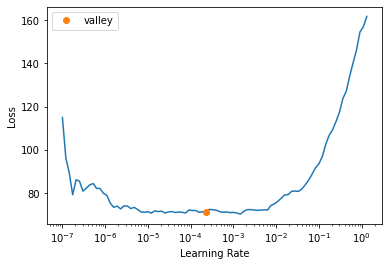

In [ ]:
learn.lr_find()

In [ ]:
learn.get_preds(dl=dl)

(tensor([[53.1014],
         [40.6621],
         [32.2586],
         ...,
         [40.0100],
         [35.9525],
         [62.0723]]), None)

In [ ]:
test_df = train_df.copy()
test_df.drop(['congestion'], axis=1, inplace=True)
#dl = learn.dls.test_dl(test_df)
